# Método de Factorización PLU por Bloques: Reporte final

El objetivo de este proyecto es programar el método de factorización PLU por bloques para resolver ecuaciones lineales de tamaño mediano a grande. El lenguaje de su implementación es Python y la plataforma para trabajarlo en equipo, Github.

# Tabla de contenidos

1. [Introducción: Breve Explicación sobre la Factorización PLU](#1.-Introducción:-Breve-Explicación-sobre-la-Factorización-PLU)
2. [Programación del Código en Python](#2.-Programación-del-Código-en-Python)
3. [Revisión del Código en Python](#3.-Revisión-del-Código-en-Python)
4. [Implementación del Algoritmo de Programación](#4.-Implementación-del-Algoritmo-de-Programación)
5. [Implementación del Algoritmo de Revisión](#5.-Implementación-del-Algoritmo-de-Revisión)
6. [Resultados Finales](#6.-Resultados-Finales)
7. [Pruebas Unitarias](#7.-Pruebas-Unitarias)
8. [Conclusiones](#8.-Conclusiones)

# 1. Introducción: Breve Explicación sobre la Factorización PLU

*La siguiente explicación sobre la factorización no tiene intenciones de ser amplia y completa, sino una breve síntesis general.
Nota generada a partir de la siguiente [liga](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/III.computo_matricial/3.3.a.Factorizacion_LU.ipynb)

### Factorización LU simple
La factorización $LU$ de una matriz resume el proceso de [eliminación Gaussiana](https://en.wikipedia.org/wiki/Gaussian_elimination) aplicada a una matriz, lo cual es conveniente en términos del número total de operaciones de punto flotante cuando se desea calcular la inversa de una matriz o cuando se resolverá una serie de sistema de ecuaciones con una misma matriz de coeficientes. 

### Factorización PLU
Frecuentemente no es posible escalonar una matriz solamente con operaciones de eliminación, por lo se requiere realizar un intercambio de renglones; para este tipo de matrices no existe la factorización $LU$ y lo que se aplica es la factorización $PA = LU$, donde la matriz P es una matriz de permutación, que se obtiene a partir de la matriz identidad al realizar el mismo intercambio de renglones. Ver [Factorización PLU](http://cb.mty.itesm.mx/ma1010/materiales/ma1010-26.pdf).

**Teorema**

Si $A \in  \mathbb{R}^{n \times n}$ es no singular, existen matrices $P, L, U$ de permutación, triangular inferior con $1$'s en la diagonal y triangular superior invertible respectivamente, tales que $PA = LU$.

Se puede demostrar que si $A$ es no singular, $L$ y $U$ existen y son únicas.

En la sección de la factorización $PLU$ se aplicaron recursivamente los pasos de la eliminación Gaussiana para que los elementos de las matrices $L$ y $U$ se calculen de forma iterativa utilizando un vector pivote.

### Factorización PLU por bloques

Para aprovechar de una forma más eficiente el uso de la memoria y del caché al momento de realizar el cálculo de la factorización $LU$, se puede determinar la partición de la matriz $A$, tomando submatrices de tamaño $k \times k$, de modo que podemos realizar una partición de las matrices para realizar una evaluación más eficiente en tiempo del método correspondiente. Un ejemplo gráfico se puede encontrar de la siguiente manera:

Una matriz de la forma:

![PLU_por_bloques_1](../img/PLU_por_bloques_1.JPG)

Fuente:[Paralelización de la Factorización de Matrices en Clusters](http://sedici.unlp.edu.ar/bitstream/handle/10915/23049/Art_C121.pdf?sequence=1) 

Puede factorizarse de la siguiente forma en bloques o sub particiones: 

![PLU_por_bloques_2](../img/PLU_por_bloques_2.JPG)

Fuente:[Paralelización de la Factorización de Matrices en Clusters](http://sedici.unlp.edu.ar/bitstream/handle/10915/23049/Art_C121.pdf?sequence=1) 




# 2. Programación del Código en Python

Todas las librerías que se necesitan para correr el código se encuentran en el archivo **Requirements.txt**, que puede ser usado para instalarlas.

En el equipo de programación se implementó el código como si fuera una paquetería que puede ser instalada mediante el uso de un install desde la raíz con el siguiente comando:

    sudo python setup.py install

En este caso, se realizará la importación normal

In [1]:
#Standard library modules
import numpy as np
import scipy
from math import ceil
from scipy.linalg import solve_triangular

import sys
sys.path.append('../notebooks/Programacion/') #Para poder importar la anterior versión de factorizacion_PLU
#sys.path.append('./../../')
sys.path.append('./../')


# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

#Funciones de programación
from src.algorithms import TodoJunto

#Funciones de revisión
from src.test_algorithms import revision_modular

import numpy as np

La programación consistió básicamente en crear funciones que hicieran a grandes razgos, lo siguiente:
* validate: valida que una matriz sea cuadrada
* forward_substitution: Algoritmo de Forward substitution orientado a filas
* backward_substitution: Algoritmo de Backward substitution orientado a filas
* get_P: Esta función obtiene la matriz pivote derivada del intercambio de elementos en la matriz identidad original
* PLU: Esta función desarrolla la factorización $PA = LU$, donde P es la matriz de permutación codificada por piv(l:n - 1), guarda los índices fila de los pivotes, de tal modo que la columnas intercambiadas se guardan en el vector $P$.
* solve: Esta función resuelve un sistema de ecuaciones de la forma $Ax = b$ con la factorización $PLU$.
* solve_blocks: Esta función resuelve un sistema de ecuaciones de la forma $Ax = b$ con la factorización $PLU$ y por bloques.
 

El script que corresponde a la programción se llama TodoJunto.py y se encuentra en [Factorización PLU](src/algorithms/TodoJunto.py).
* Para más información sobre los siguientes códigos, se pueden consultar los notebooks correspondientes:
    - [Algoritmos intermedios y finales para la computación de PLU](notebooks/Programacion/FactorizacionPLU.ipynb)
    - [Algoritmo de eliminación por bloques](notebooks/Programacion/EliminacionPorBloques.ipynb)

# 3. Revisión del código en Python
Para verificar el correcto funcionamiento del algoritmo, el equipo de revisión implementó también algunas funciones para probar el código anteriormente mencionado, tales como: 
* crea_matrices: crea matrices de forma aleatoria. La función devuelve una matriz $A$ cuadrada de dimensión $n \times n$
* factoriza_plu: ejecuta el algoritmo de $PLU$ y mide el tiempo de ejecución total del algoritmo.
* resuelve_bloques: ejecuta el algoritmo de SEL por medio de bloques y mide el tiempo de ejecución total del algoritmo.
* solve_A_b: ejecuta el algoritmo que resuelve un sistema de ecuaciones de la forma $Ax = b$ con la factorización $PLU$ y mide el tiempo de ejecución total del algoritmo.
* condicion: calcula la condición de la matriz cuadrada $A$.
* revision_PLU: el objetivo principal de esta función es revisar que la igualdad $PA=LU$ se cumpla y generar un data frame con información sobre la dimensión y condición de la matriz $A$, el tiempo de ejecución del algoritmo $PLU$ y el estado de la verificación de la igualdad (Ej: Correcto o Incorrecto).
* revision_x: el objetivo principal de esta función es verificar que la solución estimada del sistema de ecuaciones x_est sea la correcta al compararla con la x_real y generar un data frame con información sobre la dimensión y condición de la matriz $A$, el tiempo de ejecución del algoritmo solve que resuelve el sistema, el estado de la verificación de la solución (Ej: Correcto o Incorrecto), el error absoluto entre x_est y x_real y el tipo de matriz $A$.
* revision_bloques: el objetivo principal de esta función es verificar que la solución estimada del sistema de ecuaciones solucion_bloques, del algoritmo por bloques, sea la correcta al compararla con la solucion_real y generar un data frame con información sobre la dimensión y condición de la matriz $A$, el tiempo de ejecución del algoritmo solve_blocks que resuelve el sistema, el estado de la verificación de la solución (Ej: Correcto o Incorrecto), el error absoluto entre solucion_bloques y solucion_real y el tipo de matriz.


El script que corresponde a la programción se llama revision_modular.py y se encuentra en [Revisión Modular](notebooks/Revision/revision_modular.py).
* Para más información sobre el proceso histórico seguido por el equipo de revisión, se puede consultar el siguiente notebook [Procedimiento Revisión](notebooks/Revision/Procedimiento_revision.ipynb).


# 4. Implementación del algoritmo de programación

En este sección, se realiza una corrida completa de los algoritmos de programación, con matrices pequeñas, para ejemplificar su implementación:

- Primero, se prueba el algoritmo que realiza la factorización PLU.
- Segundo, se prueba el algoritmo que resuelve el sistema lineal de ecuaciones.
- Tercero, se prueba el algorimo que resuleve el sistema por eliminación por bloques.

### Algoritmo que realiza la factorización PLU

In [2]:
# Para ejemplificar, creamos una matriz aleatoria de tamaño 10x10
n=np.random.randint(10, 10+1)
A=np.array(np.random.randint(-90,99, size=(n, n)))
A

array([[ 74,  47, -51, -11,  35, -46,  57,  46,  35,  50],
       [-11,  51, -12,  52,  24, -85,  12,  -9,  -1,  42],
       [ 79, -22,  29,  49, -46,  -1,  55, -32,  11, -90],
       [ 94, -13, -22, -66, -80, -61,  47,  28, -89,  60],
       [  6,   1,  11,   3,  52, -43, -21,  19, -12,  72],
       [-85,  21,  87, -57, -16,  31,  92,  16, -63,  68],
       [ 14,  95,  69, -58,  87, -43,  87,   5, -27, -15],
       [ 67, -20,  61,  75, -63,  16,  14, -27,  21,  20],
       [ 81, -38, -18,  22,  83, -79, -54, -46,  43, -62],
       [ 59, -60, -65, -75,  97, -21,   5, -28, -78,  94]])

In [3]:
# Calculamos la factorización PLU llamando a la función PLU
P, L, U = TodoJunto.PLU(A)

In [4]:
# Resultado de la matriz P
P

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
# Resultado de la matriz L
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.14893617,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.71276596, -0.1107331 ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.90425532,  0.09536874,  0.71103477,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.62765957, -0.53478929, -0.14806458,  0.21558839,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.86170213, -0.27644864,  0.24725035, -0.18813447,  0.713959  ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.11702128,  0.51042581, -0.60774348, -0.71662599, -0.47343616,
         0.98788123,  1.        ,  0.        

In [6]:
# Resultado de la matriz U
U

array([[  94.        ,  -13.        ,  -22.        ,  -66.        ,
         -80.        ,  -61.        ,   47.        ,   28.        ,
         -89.        ,   60.        ],
       [   0.        ,   96.93617021,   72.27659574,  -48.17021277,
          98.91489362,  -33.91489362,   80.        ,    0.82978723,
         -13.74468085,  -23.93617021],
       [   0.        ,    0.        ,   84.68426251,  116.70851624,
           4.97442932,   55.72322212,  -10.64135206,  -46.8655619 ,
          82.9141791 ,  -25.41648376],
       [   0.        ,    0.        ,    0.        , -195.07073089,
        -101.31080694,  -60.54630185,  134.43687171,   74.56305701,
        -201.12277439,  142.61008523],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         222.68936171,   20.4536274 ,  -12.27549242,  -68.14476579,
          26.14758175,    9.03125892],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  -75.58338041,  -35.69662242,    4

### Algoritmo que resuelve el sistema lineal de ecuaciones

In [7]:
# Generamos un vector b aleatorio con las soluciones de tamaño 1x10
b=np.array(np.random.randint(-90,99, size=(n, 1)))
b

array([[-50],
       [-15],
       [-71],
       [-37],
       [ 54],
       [-28],
       [  5],
       [ 39],
       [ 40],
       [ 64]])

In [8]:
# Resolvemos el sistema llamando a la función solve
TodoJunto.solve(A,b)

array([[ 0.47614334],
       [ 0.52174642],
       [ 0.55643102],
       [-0.19816221],
       [ 0.27153522],
       [ 0.46946642],
       [-1.1234913 ],
       [-0.61225607],
       [-0.14971236],
       [ 0.51951893]])

### Algoritmo que resuelve el sistema por eliminación por bloques

In [9]:
#Resolvemos el sistema llamando a la función solve_blocks

x_nuestra = TodoJunto.solve_blocks(A,b)
print(x_nuestra)

[[ 0.47614334  0.46946642]
 [ 0.52174642 -1.1234913 ]
 [ 0.55643102 -0.61225607]
 [-0.19816221 -0.14971236]
 [ 0.27153522  0.51951893]]


Se puede observar que las dos formas de resolver el algoritmo (sin bloques usando solve y con bloques usando solve_blocks) dan el mismo vector x de respuesta. No obstante, hasta esta parte solo sabemos que ambas funciones dan el mismo vector, no si están resolviendo el sistema de forma satisfactoria. Para ello, hay que pasar a la sección de revisión. 


# 5. Implementación del Algoritmo de Revisión

En este sección, se realiza una corrida completa de los algoritmos de revisión, con matrices medianas y grandes, para ejemplificar su implementación:

- Primero, se prueba el algoritmo que revisa la factorización PLU.
- Segundo, se prueba el algoritmo que revisa la solución del sistema lineal de ecuaciones.
- Tercero, se prueba el algorimo que revisa  la solución del sistema por eliminación por bloques.

Las funciones de revisión llaman a las funciones de programación, corren los algoritmos para múltiples matrices aletatorias de distintos tamaños y entregan un data frame con las características de cada corrida. 

### Algoritmo que revisa la factorización PLU

In [58]:
#Corremos el algoritmo revision_PLU que usa la función PLU para generar 10 ejemplos 
rev_plu = revision_modular.revision_PLU(10,10**2,10**3+1,-99,99)
rev_plu

,dimension_A,condicion_A,tiempo_plu,status_plu
0,950,6160.464722,480.797077,Correcto
1,436,663.794912,47.830825,Correcto
2,707,4317.074411,202.151649,Correcto
3,155,369.956501,2.108075,Correcto
4,544,4609.178438,88.756652,Correcto
5,496,16405.846656,70.960904,Correcto
6,269,445.517469,11.036275,Correcto
7,923,1930.248741,402.917221,Correcto
8,692,1802.628115,181.958976,Correcto
9,468,32918.172317,56.624681,Correcto


La función revisión_PLU devuelve un data frame con información sobre la dimensión de la matriz A (dimension_A), la condición de la matriz A (condicion_A), el tiempo que tarda en correr el algoritmo PLU (tiempo_plu) y el si el status es correcto o incorrecto al resolver PA=LU (status_plu).

En el data frame, se puede observar que:

- El algoritmo resolvió la factorización de manera exitosa las 10 veces.
- El tiempo de ejecución máximo es de 480.8 segundos y 8 minutos para una matriz de dimensión 950x950 y que el tiempo mínimo de ejecución es de 2.1 segundos para un matriz de 155x155.
- El tiempo de ejecución tiene una tendencia monótona creciente al compararlo con la dimensión de la matriz A. Es decir que a mayor tamaño, es mayor el tiempo de ejecución.
- Con respecto a la condición de las matrices, ninguna está bien condiconada pues la condición dista mucho del 1.

### Algoritmo que revisa la solución del sistema lineal de ecuaciones

In [59]:
#Corremos el algoritmo revision_x que usa la función solve para generar 10 ejemplos 
rev_x = revision_modular.revision_x(10,10**2,10**3+1,-99,99)
rev_x

,dimension_A,condicion_A,tiempo_x,estado_x,error_absoluto,tipo_matriz
0,954,4187.790948,474.786941,Correcto,4.345978e-10,no singular
1,374,2332.691736,28.621497,Correcto,1.075591e-10,no singular
2,423,2423.069516,41.448981,Correcto,1.713345e-10,no singular
3,205,594.314518,4.609567,Correcto,5.451465e-11,no singular
4,873,785.980084,336.995339,Correcto,1.912129e-10,no singular
5,850,3171.798365,332.763004,Correcto,3.413496e-10,no singular
6,266,1168.066656,10.258442,Correcto,2.978974e-11,no singular
7,725,5405.895149,213.163540,Correcto,1.697044e-10,no singular
8,888,1798.951061,371.579662,Correcto,1.096124e-10,no singular
9,387,517.774218,34.546217,Correcto,4.314533e-11,no singular


La función revisión_x devuelve un data frame con información sobre la dimensión de la matriz A (dimension_A) , la condición de la matriz A (condicion_A), el tiempo que tarda en correr el algoritmo solve (tiempo_x), el status correcto o incorrecto (estado_x) al resolver el sistema, el error absoluto (error_absoluto) y si la matriz A es singular o no singular (tipo_matriz).

En el data frame, se puede observar que:

- El algoritmo resolvió la factorización de manera exitosa las 10 veces.
- El tiempo de ejecución máximo es de 474.8 segundos y 7.9 minutos para una matriz de dimensión 954x954 y que el tiempo mínimo de ejecución es de 4.6 segundos para un matriz de 205x205.
- El tiempo de ejecución tiene una tendencia monótona creciente al compararlo con la dimensión de la matriz A. Es decir que a mayor tamaño, es mayor el tiempo de ejecución.
- Con respecto a la condición de las matrices, ninguna está bien condiconada pues la condición dista mucho del 1.
- Las 10 matrices A fueron no singulares, por lo que se procedió a la solución. 
- El error absoluto muestra una precisión de 10 o 11 dígitos correctos.

### Algoritmo que revisa la solución del sistema por eliminación por bloques

In [10]:
#Corremos el algoritmo revision_bloques que usa la función solve_blocks para generar 10 ejemplos 
bloques=revision_modular.revision_bloques(10,10**2,10**3+1,-99,99)
bloques

'Incorrecto para A igual a:'
array([[-75,   3, -97, ..., -62,  94, -21],
       [-57, -80, -31, ...,  21, -87,  82],
       [-40, -51, -34, ..., -51, -29,   5],
       ...,
       [ 42,  78,  88, ...,  93,  67,  39],
       [-62,  40, -89, ..., -35,  23,   7],
       [-84,   7, -51, ..., -22, -70,  44]])


,dimension_A,condicion_A,tiempo_bloques,solucion_bloques,error_absoluto,tipo_matriz
0,930,18105.154650,203.463456,Correcto,1.662530e-09,no singular
1,293,207.560705,6.488861,Correcto,1.218653e-10,no singular
2,648,2324.582880,71.174866,Correcto,5.924319e-11,no singular
3,891,2228.878259,181.762999,Correcto,1.836509e-10,no singular
4,365,14125.992612,11.289088,Correcto,3.800165e-10,no singular
5,866,3946.759034,162.291712,Correcto,1.237399e-10,no singular
6,161,681.569861,1.138721,Correcto,2.772573e-12,no singular
7,417,1306.396387,17.374909,Correcto,3.637412e-11,no singular
8,992,26312.485760,233.856070,Correcto,1.331493e-09,no singular
9,970,35648.907568,208.470082,Incorrecto,4.107972e-08,no singular


La función revisión_x devuelve un data frame con información sobre la dimensión de la matriz A (dimension_A) , la condición de la matriz A (condicion_A), el tiempo que tarda en correr el algoritmo solve (tiempo_x), el status correcto o incorrecto (estado_x) al resolver el sistema, el error absoluto (error_absoluto) y si la matriz A es singular o no singular (tipo_matriz).

En el data frame, se puede observar que:

- El algoritmo resolvió la factorización de manera exitosa las 10 veces.
- El tiempo de ejecución máximo es de 474.8 segundos y 7.9 minutos para una matriz de dimensión 954x954 y que el tiempo mínimo de ejecución es de 4.6 segundos para un matriz de 205x205.
- El tiempo de ejecución tiene una tendencia monótona creciente al compararlo con la dimensión de la matriz A. Es decir que a mayor tamaño, es mayor el tiempo de ejecución.
- Con respecto a la condición de las matrices, ninguna está bien condiconada pues la condición dista mucho del 1.
- Las 10 matrices A fueron no singulares, por lo que se procedió a la solución. 
- El error absoluto muestra una precisión de 10 o 11 dígitos correctos.

# 6. Resultados finales

Los parámetros que se evaluaron son: dimensión de la matriz A, número condición de A, tiempo de cada bloque, solución  correcta o incorrecta, error absoluto y tipo de matriz obtenida.

con base en las corridas anteriores, mostraremos ciertas gráficas que nos ayudarán a evaluar el desempeño de los algoritmos.

### Dimensión de la matriz $A$ vs tiempo de ejecución en el algoritmo por bloques:

In [49]:
bloques.sort_values(by=['dimension_A'],inplace=True)
dimension = bloques['dimension_A']
tiempo=bloques['tiempo_bloques']

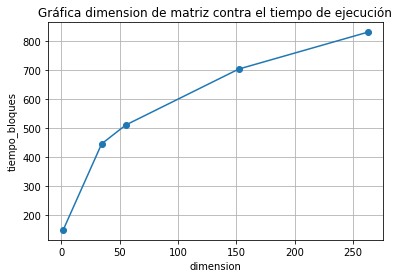

In [50]:
import matplotlib.pyplot as plt
plt.plot(tiempo,dimension,'o-')
plt.title('Gráfica dimension de matriz contra el tiempo de ejecución')
plt.xlabel('dimension')
plt.ylabel('tiempo_bloques')
plt.grid()
plt.show()

### Número de condición de la matriz $A$ y el tiempo de ejecución en el algoritmo por bloques:

In [56]:
bloques.sort_values(by=['condicion_A'],inplace=True)
condicion = bloques['condicion_A']
tiempo=bloques['tiempo_bloques']

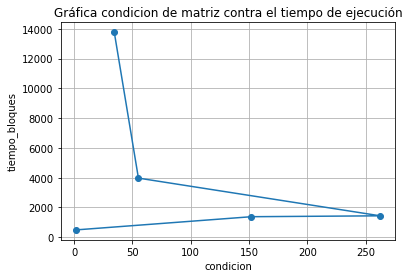

In [57]:
import matplotlib.pyplot as plt
plt.plot(tiempo,condicion,'o-')
plt.title('Gráfica condicion de matriz contra el tiempo de ejecución')
plt.xlabel('condicion')
plt.ylabel('tiempo_bloques')
plt.grid()
plt.show()

### Dimensión de la matriz $A$ y el error relativo en el algoritmo por bloques:

In [53]:
bloques.sort_values(by=['dimension_A'],inplace=True)
dimension = bloques['dimension_A']
error_abs=bloques['error_absoluto']

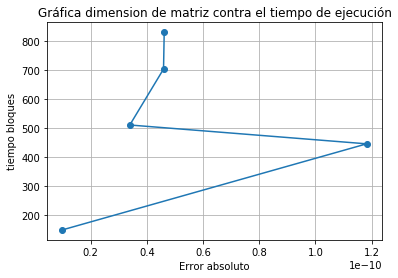

In [55]:
import matplotlib.pyplot as plt
plt.plot(error_abs,dimension,'o-')
plt.title('Gráfica dimension de matriz contra el tiempo de ejecución')
plt.xlabel('Error absoluto')
plt.ylabel('tiempo bloques')
plt.grid()
plt.show()

Se puede observar en la gráfica que 

# 7. Pruebas Unitarias
Finalmente, se corrió una prueba unitaria, que puede ser encontrada en el siguiente notebook: [Unit Testing](notebooks/Programacion/UnitTestingPLU.ipynb).

Los resultados fueron los siguientes:
![Unit_Testing_Results](../img/resultado_prueba_unitaria.JPG)

# 8. Conclusiones